In [23]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [24]:
file = 'airline_passenger_satisfaction.csv'
airline_data = pd.read_csv(file)

In [25]:
airline_data.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [26]:
airline_data = airline_data.drop('Unnamed: 0', axis=1)

In [27]:
# Here we can see that the arrival_delay_in_minutes has 393 rows with blank data. These should be removed. 
print(airline_data.isna().sum())

Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64


In [28]:
pre_clean_length = len(airline_data)
print(f"The data length pre-cleaning was {pre_clean_length}")
airline_data_clean = airline_data.dropna()
print(f"The data length post-cleaning was {len(airline_data_clean)}")
difference = pre_clean_length - len(airline_data_clean)
print(f"{difference} rows were removed.")

The data length pre-cleaning was 129880
The data length post-cleaning was 129487
393 rows were removed.


In [29]:
airline_data_clean.to_csv('Tableu_Ready_Airline_Data', index=False)

# Prep data for ML

In [30]:
# Transform binary data into 0s and 1s
airline_data_clean[['Gender']] = airline_data_clean[['Gender']].replace(['Male', 'Female'], [0,1])
airline_data_clean[['customer_type']] = airline_data_clean[['customer_type']].replace(['Loyal Customer', 'disloyal Customer'], [0,1])
airline_data_clean[['type_of_travel']] = airline_data_clean[['type_of_travel']].replace(['Personal Travel', 'Business travel'], [0,1])
airline_data_clean[['satisfaction']] = airline_data_clean[['satisfaction']].replace(['neutral or dissatisfied', 'satisfied'], [0,1])
airline_data_clean

C:\Users\Elizabeth\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,0,13,0,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,1,25,1,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,0,26,1,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,0,25,1,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,0,61,1,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,1,34,1,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
129876,0,0,23,1,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
129877,1,0,17,0,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
129878,0,0,14,1,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


In [31]:
# One hot encode the object column (customer_class)
airline_data_clean = pd.get_dummies(airline_data_clean)

In [52]:
! pip install seaborn

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

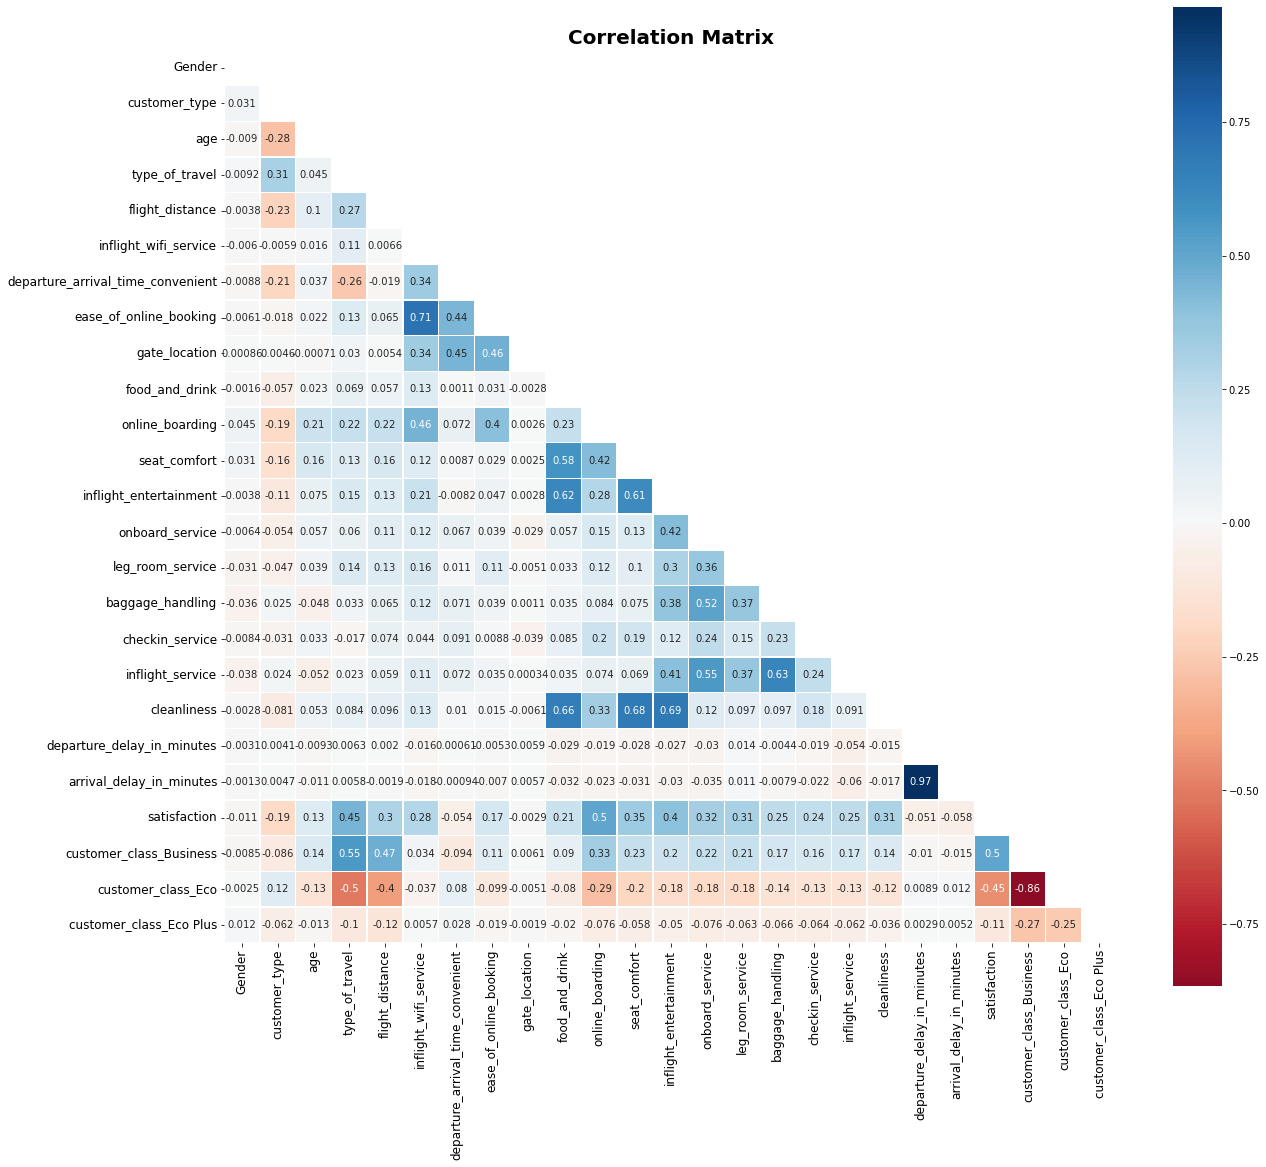

In [61]:
# Create a correlation matrix
# corr_matrix = airline_data_clean.corr()

# # Set the figure size
# fig, ax = plt.subplots(figsize=(18, 16))

# # Plot the correlation matrix as a heatmap
# sns.heatmap(corr_matrix, cmap='coolwarm', ax=ax)

# # Show the plot
# plt.show()

corr = airline_data_clean.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})


plt.title("Correlation Matrix", fontsize=20, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')

plt.show()


# Supervised ML

In [32]:
airline_data_clean['satisfaction'].value_counts()

0    73225
1    56262
Name: satisfaction, dtype: int64

In [33]:
airline_data_clean.columns

Index(['Gender', 'customer_type', 'age', 'type_of_travel', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'onboard_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction', 'customer_class_Business', 'customer_class_Eco',
       'customer_class_Eco Plus'],
      dtype='object')

In [34]:
 # Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X = airline_data_clean[['Gender', 'customer_type', 'age', 'type_of_travel', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'onboard_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes', 
        'customer_class_Business', 'customer_class_Eco',
       'customer_class_Eco Plus']]
y = airline_data_clean['satisfaction']

print("Shape: ", X.shape, y.shape)

Shape:  (129487, 24) (129487,)


In [13]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [14]:
# Train a Logistic Regression model print the model score
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8040570457704783
Testing Data Score: 0.8057271716298036


C:\Users\Elizabeth\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [38]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
98173,1,1
24942,1,0
69235,0,0
90480,1,1
36184,1,0
...,...,...
77831,0,0
57657,1,1
21577,0,0
49633,0,0


In [45]:
from sklearn.metrics import classification_report
predictions = classifier.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=['Satisfied', 'Neutral/Disatisfied']))

                     precision    recall  f1-score   support

          Satisfied       0.86      0.80      0.83     18371
Neutral/Disatisfied       0.76      0.82      0.79     14001

           accuracy                           0.81     32372
          macro avg       0.81      0.81      0.81     32372
       weighted avg       0.81      0.81      0.81     32372



C:\Users\Elizabeth\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [48]:
print('Test Acc: %.3f' % classifier.score(X_test_scaled, y_test))

Test Acc: 0.811


C:\Users\Elizabeth\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


# Random Forest

In [15]:
# Train a Random Forest Classifier model and print the model score
clf = RandomForestClassifier(random_state=42, n_estimators=100).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9999897029295165
Testing Score: 0.9610156925738292


In [41]:
predictions = clf.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

C:\Users\Elizabeth\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,Prediction,Actual
98173,1,1
24942,1,0
69235,1,0
90480,1,1
36184,1,0
...,...,...
77831,1,0
57657,1,1
21577,1,0
49633,1,0


In [46]:
from sklearn.metrics import classification_report
predictions = clf.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=['Satisfied', 'Neutral/Disatisfied']))

                     precision    recall  f1-score   support

          Satisfied       0.96      0.98      0.97     18371
Neutral/Disatisfied       0.97      0.94      0.95     14001

           accuracy                           0.96     32372
          macro avg       0.96      0.96      0.96     32372
       weighted avg       0.96      0.96      0.96     32372



In [47]:
print('Test Acc: %.3f' % clf.score(X_test_scaled, y_test))

Test Acc: 0.961


# Feature Importance

In [16]:
# Get the feature importance scores
rf_importance_scores = clf.feature_importances_

# Create a new DataFrame with feature names and importance scores
rf_feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': rf_importance_scores})

# Sort the feature importance dataframe by Importance column in descending order
rf_feature_importance_df = rf_feature_importance_df.sort_values('Importance', ascending=False)

# Export the feature importance dataframe to a CSV file
rf_feature_importance_df.to_csv('rf_feature_importance.csv', index=False)

# Print the feature importance dataframe
print(rf_feature_importance_df)

                              Feature  Importance
10                    online_boarding    0.164028
5               inflight_wifi_service    0.139145
3                      type_of_travel    0.092534
21            customer_class_Business    0.085556
12             inflight_entertainment    0.046059
11                       seat_comfort    0.045780
22                 customer_class_Eco    0.043603
7              ease_of_online_booking    0.036978
1                       customer_type    0.035067
14                   leg_room_service    0.034057
2                                 age    0.032816
13                    onboard_service    0.031653
4                     flight_distance    0.031295
18                        cleanliness    0.029401
17                   inflight_service    0.026386
16                    checkin_service    0.024408
15                   baggage_handling    0.023898
6   departure_arrival_time_convenient    0.017789
8                       gate_location    0.015573


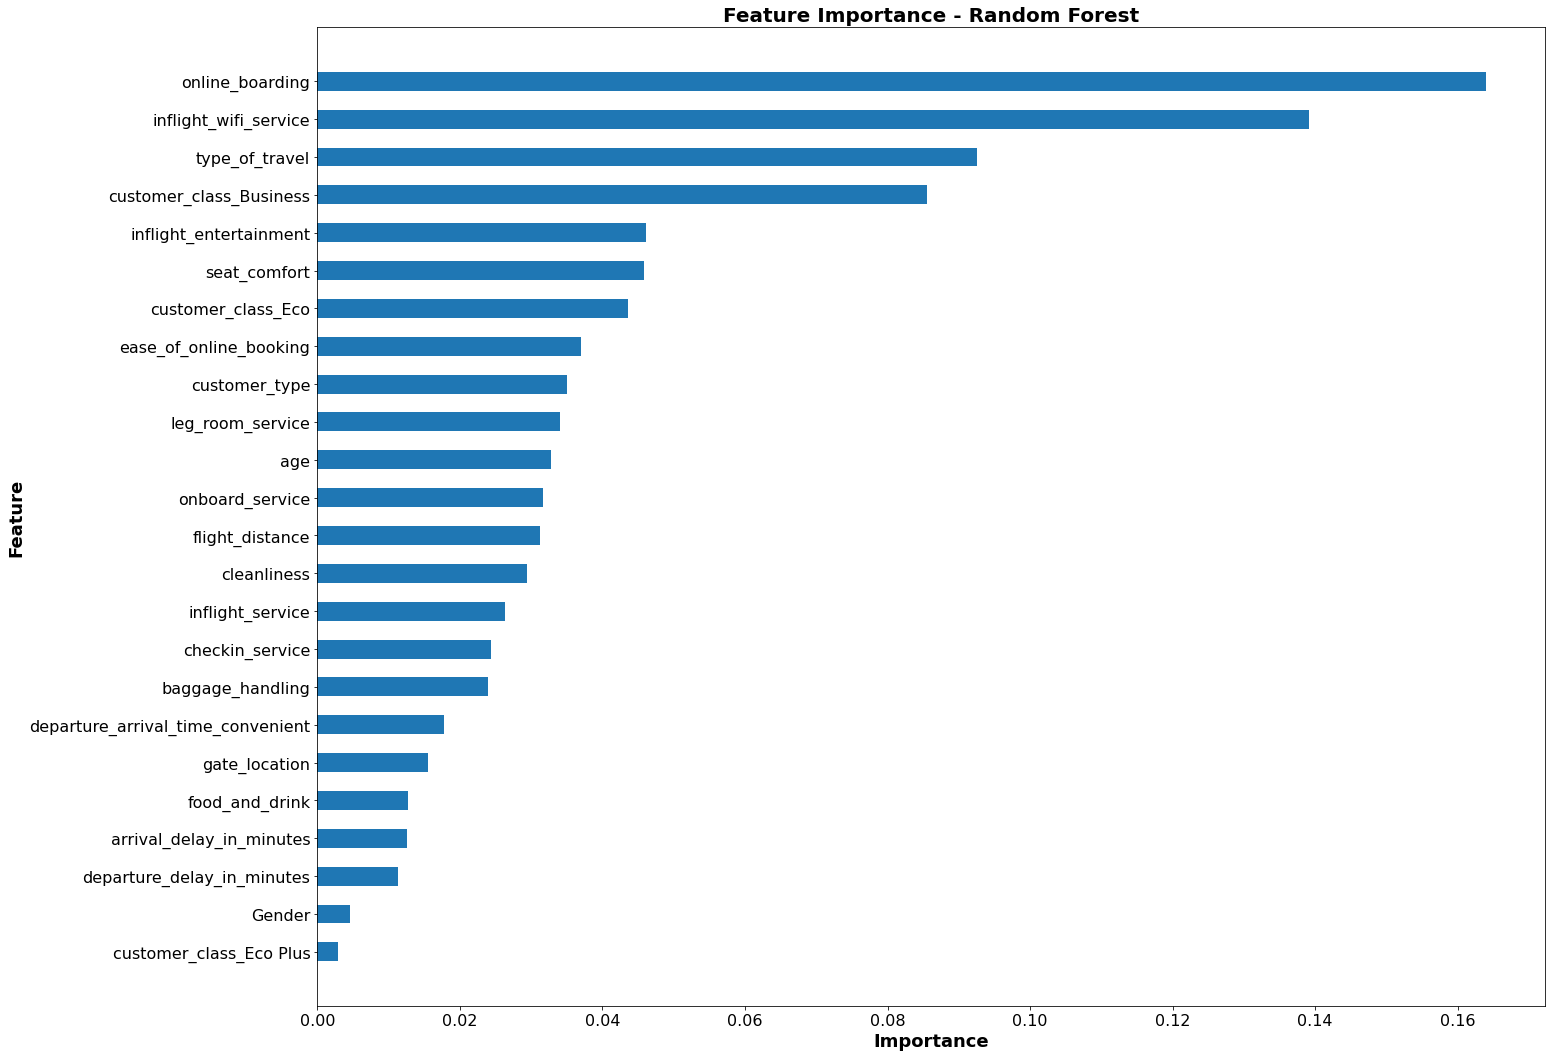

In [17]:
# Plot the feature importance
rf_feature_importance_df = rf_feature_importance_df.sort_values('Importance', ascending=True)
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(22, 18))

# Plot the feature importance
ax.barh(rf_feature_importance_df['Feature'], rf_feature_importance_df['Importance'],height=0.5)

# Label axis
ax.set_xlabel('Importance', fontsize = 18, fontweight = 'bold')
ax.set_ylabel('Feature', fontsize = 18, fontweight = 'bold')

# Set title and adjust axis tick font size
ax.set_title('Feature Importance - Random Forest',
             fontsize = 20, 
             fontweight="bold")
ax.tick_params(axis='both', which='major', labelsize=16)

# Save the figure
plt.savefig('rf_feature_importance.png', dpi=300, bbox_inches='tight')

plt.show()

In [18]:
# Get the feature importance
lr_feature_importance = abs(classifier.coef_[0])

# Create a DataFrame to display the feature importance
lr_feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': lr_feature_importance})
lr_feature_importance_df = lr_feature_importance_df.sort_values('Importance', ascending=False)
print(lr_feature_importance_df)

# Export the feature importance dataframe to a CSV file
lr_feature_importance_df.to_csv('lr_feature_importance.csv', index=False)

                              Feature  Importance
10                    online_boarding    0.674825
22                 customer_class_Eco    0.645134
21            customer_class_Business    0.448363
5               inflight_wifi_service    0.392040
6   departure_arrival_time_convenient    0.376815
8                       gate_location    0.326841
9                      food_and_drink    0.318831
3                      type_of_travel    0.317573
12             inflight_entertainment    0.291381
1                       customer_type    0.279617
17                   inflight_service    0.189509
13                    onboard_service    0.183366
0                              Gender    0.158372
15                   baggage_handling    0.157778
14                   leg_room_service    0.137862
23            customer_class_Eco Plus    0.085000
7              ease_of_online_booking    0.062934
18                        cleanliness    0.053584
11                       seat_comfort    0.038417


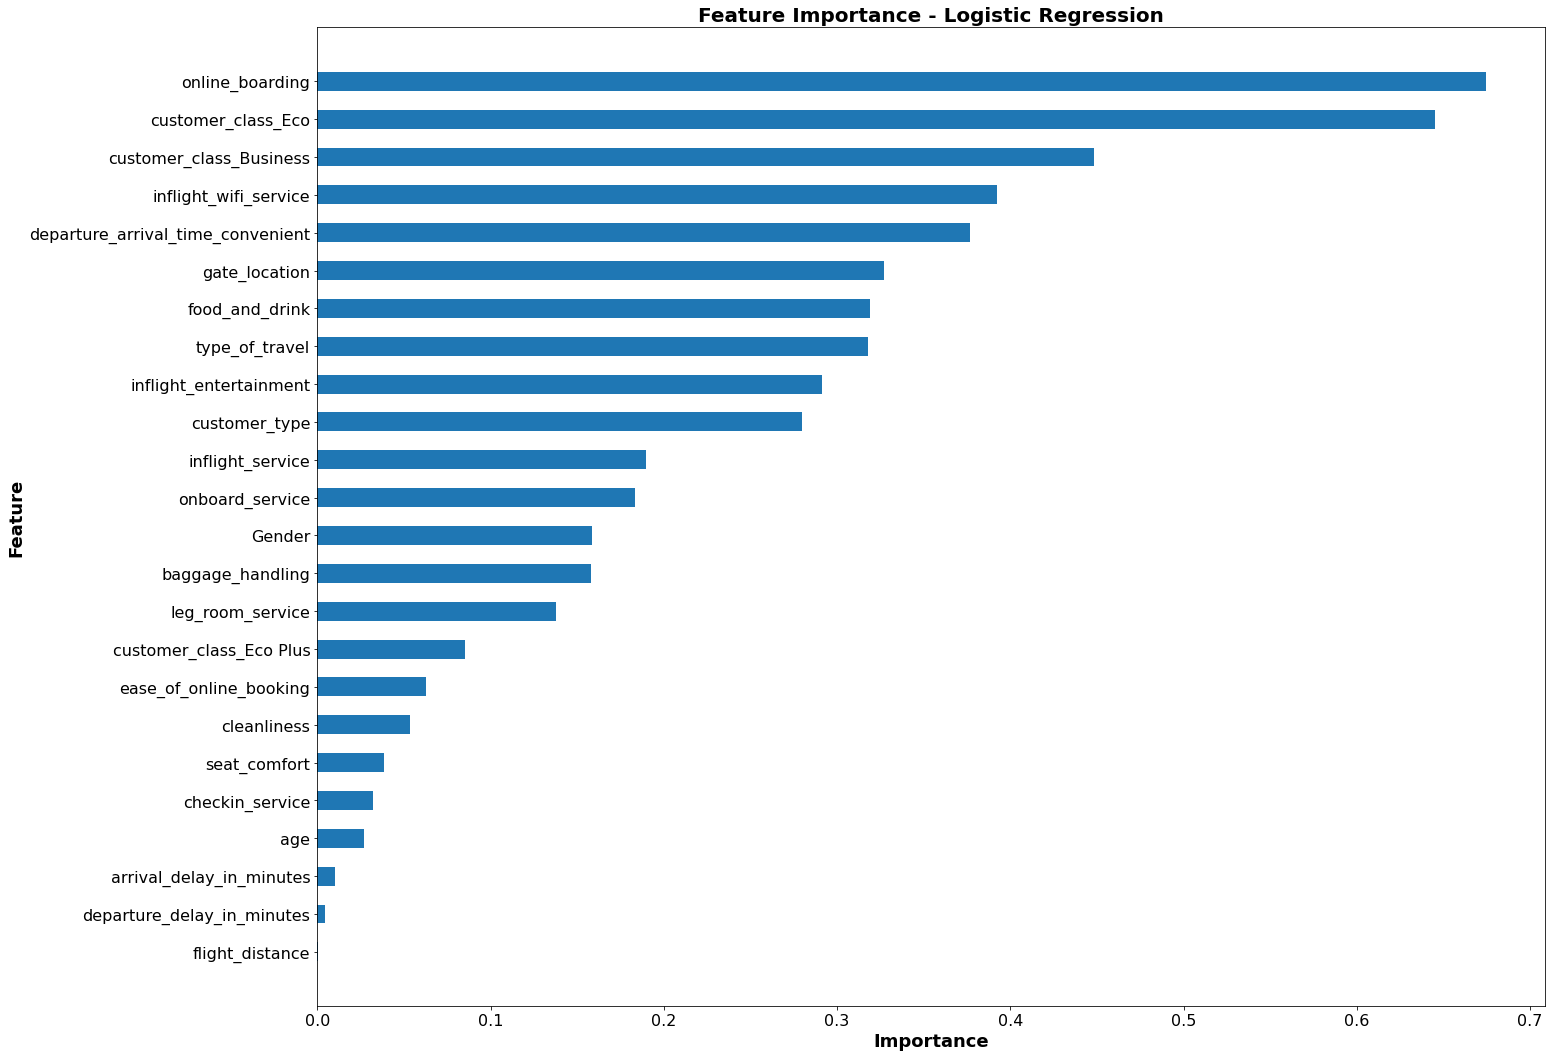

In [19]:
# Plot the feature importance
lr_feature_importance_df = lr_feature_importance_df.sort_values('Importance', ascending=True)
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(22, 18))

# Plot the feature importance
ax.barh(lr_feature_importance_df['Feature'], lr_feature_importance_df['Importance'],height=0.5)

# Label axis
ax.set_xlabel('Importance', fontsize = 18, fontweight = 'bold')
ax.set_ylabel('Feature', fontsize = 18, fontweight = 'bold')

# Set title and adjust axis tick font size
ax.set_title('Feature Importance - Logistic Regression',
             fontsize = 20, 
             fontweight="bold")
ax.tick_params(axis='both', which='major', labelsize=16)

# Save the figure
plt.savefig('lr_feature_importance.png', dpi=300, bbox_inches='tight')

plt.show()